In [1]:
 # Cell 1: Import necessary libraries for data analysis, statistical tests, and visualization
import pandas as pd
import numpy as np
import qdesc as qd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# Cell 2: Load the NiTPHLeX dataset from Excel file and display the first 5 rows
df = pd.read_excel("NiTPHLeXVideoStreaming.xlsx")
df.head()

,user_location_type,peak_hour_flag,concurrent_users,buffer_events_per_session,mobile_error_rate(proportion),video_load_time(seconds),subtitle_accuracy_score(0-1),average_viewing_time(hours),churn_flag,server_cost(in USD),content_engagement_score(0-100)
0,urban,True,2173,3,0.04,6.09,0.93,0.29,Yes,402.79,75.55
1,rural,False,859,2,0.07,6.76,0.96,0.88,No,280.01,75.82
2,rural,False,207,2,0.09,5.15,0.95,1.55,No,235.06,76.42
3,urban,False,228,2,0.03,4.21,0.97,0.47,Yes,234.12,77.30
4,urban,True,1295,0,0.04,7.24,0.96,1.64,No,409.14,75.58


In [3]:
# Cell 3: Display basic information about the DataFrame (columns, data types, non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3487 entries, 0 to 3486
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   user_location_type               3487 non-null   object 
 1   peak_hour_flag                   3487 non-null   bool   
 2   concurrent_users                 3487 non-null   int64  
 3   buffer_events_per_session        3487 non-null   int64  
 4   mobile_error_rate(proportion)    3487 non-null   float64
 5   video_load_time(seconds)         3487 non-null   float64
 6   subtitle_accuracy_score(0-1)     3487 non-null   float64
 7   average_viewing_time(hours)      3487 non-null   float64
 8   churn_flag                       3487 non-null   object 
 9   server_cost(in USD)              3487 non-null   float64
 10  content_engagement_score(0-100)  3487 non-null   float64
dtypes: bool(1), float64(6), int64(2), object(2)
memory usage: 276.0+ KB


In [4]:
# Cell 4: Check for missing values in the dataset and summarize per column
print("Any missing values:", df.isnull().values.any())
print("Missing values per column:")
print(df.isnull().sum())

Any missing values: False
Missing values per column:
user_location_type                 0
peak_hour_flag                     0
concurrent_users                   0
buffer_events_per_session          0
mobile_error_rate(proportion)      0
video_load_time(seconds)           0
subtitle_accuracy_score(0-1)       0
average_viewing_time(hours)        0
churn_flag                         0
server_cost(in USD)                0
content_engagement_score(0-100)    0
dtype: int64


In [5]:
# Cell 5: Generate quick descriptives and Anderson-Darling normality statistics for numerical variables
qd.desc(df)

,count,mean,std,median,MAD,min,max,AD_stat,5% crit_value
concurrent_users,3487.0,897.73,663.50,702.00,257.00,200.00,2997.00,245.07,0.79
buffer_events_per_session,3487.0,1.30,1.29,1.00,1.00,0.00,9.00,170.24,0.79
mobile_error_rate(proportion),3487.0,0.06,0.03,0.06,0.02,0.01,0.15,55.73,0.79
video_load_time(seconds),3487.0,6.02,1.93,5.97,1.32,0.14,13.66,2.44,0.79
subtitle_accuracy_score(0-1),3487.0,0.93,0.07,0.95,0.02,0.49,1.03,499.57,0.79
average_viewing_time(hours),3487.0,1.05,0.51,1.05,0.36,0.10,2.98,3.64,0.79
server_cost(in USD),3487.0,320.72,65.62,314.39,43.58,122.83,573.89,9.11,0.79
content_engagement_score(0-100),3487.0,75.60,1.71,75.88,0.79,65.72,79.60,122.22,0.79


In [6]:
# Cell 6: Grouped descriptives for concurrent users by user location type
print("Concurrent Users by Location Type:")
qd.grp_desc(df, 'concurrent_users', 'user_location_type')

Concurrent Users by Location Type:


,user_location_type,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,rural,1041,925.32,691.88,716.0,265.0,200,2994,72.76,0.78
1,urban,2446,885.99,650.84,698.0,253.0,200,2997,171.95,0.79


In [7]:
# Cell 7: Grouped descriptives for buffer events by user location type
print("\nBuffer Events by Location Type:")
qd.grp_desc(df, 'buffer_events_per_session', 'user_location_type')


Buffer Events by Location Type:


,user_location_type,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,rural,1041,1.47,1.51,1.0,1.0,0,9,51.20,0.78
1,urban,2446,1.23,1.18,1.0,1.0,0,8,119.75,0.79


In [8]:
# Cell 8: Grouped descriptives for mobile error rate by user location type
print("\nMobile Error Rate by Location Type:")
qd.grp_desc(df, 'mobile_error_rate(proportion)', 'user_location_type')


Mobile Error Rate by Location Type:


,user_location_type,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,rural,1041,0.10,0.03,0.10,0.02,0.05,0.15,12.70,0.78
1,urban,2446,0.05,0.02,0.05,0.02,0.01,0.08,44.13,0.79


In [9]:
# Cell 9: Grouped descriptives for video load time by user location type
print("\nVideo Load Time by Location Type:")
qd.grp_desc(df, 'video_load_time(seconds)', 'user_location_type')


Video Load Time by Location Type:


,user_location_type,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,rural,1041,7.46,1.71,7.40,1.12,2.37,13.66,0.56,0.78
1,urban,2446,5.40,1.67,5.36,1.13,0.14,11.00,0.89,0.79


In [10]:
# Cell 10: Grouped descriptives for server cost by user location type
print("\nServer Cost by Location Type:")
qd.grp_desc(df, 'server_cost(in USD)', 'user_location_type')


Server Cost by Location Type:


,user_location_type,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,rural,1041,322.90,66.99,318.19,47.69,151.20,533.55,2.26,0.78
1,urban,2446,319.79,65.01,312.48,41.68,122.83,573.89,7.60,0.79


In [11]:
# Cell 11: Grouped descriptives for concurrent users by peak hour flag
print("Concurrent Users by Peak Hour Flag:")
qd.grp_desc(df, 'concurrent_users', 'peak_hour_flag')

Concurrent Users by Peak Hour Flag:


,peak_hour_flag,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,False,2726,596.44,227.85,597.5,198.5,200,999,28.93,0.79
1,True,761,1976.99,584.14,1971.0,478.0,1003,2997,7.86,0.78


In [12]:
# Cell 12: Grouped descriptives for buffer events by peak hour flag
print("\nBuffer Events by Peak Hour Flag:")
qd.grp_desc(df, 'buffer_events_per_session', 'peak_hour_flag')


Buffer Events by Peak Hour Flag:


,peak_hour_flag,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,False,2726,1.00,1.02,1.0,1.0,0,6,166.32,0.79
1,True,761,2.36,1.57,2.0,1.0,0,9,18.69,0.78


In [13]:
# Cell 13: Grouped descriptives for mobile error rate by peak hour flag
print("\nMobile Error Rate by Peak Hour Flag:")
qd.grp_desc(df, 'mobile_error_rate(proportion)', 'peak_hour_flag')


Mobile Error Rate by Peak Hour Flag:


,peak_hour_flag,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,False,2726,0.06,0.03,0.06,0.02,0.01,0.15,44.89,0.79
1,True,761,0.06,0.03,0.06,0.02,0.01,0.15,11.33,0.78


In [14]:
# Cell 14: Grouped descriptives for video load time by peak hour flag
print("\nVideo Load Time by Peak Hour Flag:")
qd.grp_desc(df, 'video_load_time(seconds)', 'peak_hour_flag')


Video Load Time by Peak Hour Flag:


,peak_hour_flag,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,False,2726,5.58,1.73,5.53,1.20,0.14,11.86,1.13,0.79
1,True,761,7.59,1.77,7.52,1.18,2.75,13.66,0.59,0.78


In [15]:
# Cell 15: Grouped descriptives for server cost by peak hour flag
print("\nServer Cost by Peak Hour Flag:")
qd.grp_desc(df, 'server_cost(in USD)', 'peak_hour_flag')


Server Cost by Peak Hour Flag:


,peak_hour_flag,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,False,2726,298.82,50.92,298.49,34.12,122.83,477.10,0.23,0.79
1,True,761,399.17,50.67,398.27,32.50,249.88,573.89,0.61,0.78


In [16]:
# Cell 16: Grouped descriptives for concurrent users by churn flag
print("Concurrent Users by Churn Flag:")
qd.grp_desc(df, 'concurrent_users', 'churn_flag')

Concurrent Users by Churn Flag:


,churn_flag,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,No,2940,866.89,642.17,691.0,247.0,200,2997,216.22,0.79
1,Yes,547,1063.53,747.19,791.0,374.0,206,2983,26.69,0.78


In [17]:
# Cell 17: Grouped descriptives for buffer events by churn flag
print("\nBuffer Events by Churn Flag:")
qd.grp_desc(df, 'buffer_events_per_session', 'churn_flag')


Buffer Events by Churn Flag:


,churn_flag,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,No,2940,1.16,1.13,1.0,1.0,0,5,156.18,0.79
1,Yes,547,2.06,1.77,2.0,1.0,0,9,19.41,0.78


In [18]:
# Cell 18: Grouped descriptives for mobile error rate by churn flag
print("\nMobile Error Rate by Churn Flag:")
qd.grp_desc(df, 'mobile_error_rate(proportion)', 'churn_flag')


Mobile Error Rate by Churn Flag:


,churn_flag,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,No,2940,0.06,0.03,0.06,0.02,0.01,0.15,50.00,0.79
1,Yes,547,0.07,0.03,0.06,0.02,0.01,0.15,6.25,0.78


In [19]:
# Cell 19: Grouped descriptives for video load time by churn flag
print("\nVideo Load Time by Churn Flag:")
qd.grp_desc(df, 'video_load_time(seconds)', 'churn_flag')


Video Load Time by Churn Flag:


,churn_flag,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,No,2940,5.87,1.88,5.81,1.32,0.14,13.66,2.01,0.79
1,Yes,547,6.81,1.97,6.75,1.33,1.01,12.49,0.39,0.78


In [20]:
# Cell 20: Grouped descriptives for server cost by churn flag
print("\nServer Cost by Churn Flag:")
qd.grp_desc(df, 'server_cost(in USD)', 'churn_flag')


Server Cost by Churn Flag:


,churn_flag,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,No,2940,318.91,64.49,312.38,41.41,122.83,573.89,8.36,0.79
1,Yes,547,330.46,70.63,326.84,54.83,159.24,507.94,1.88,0.78


In [21]:
# Cell 21: Grouped descriptives for average viewing time by churn flag
print("\nAverage Viewing Time by Churn Flag:")
qd.grp_desc(df, 'average_viewing_time(hours)', 'churn_flag')


Average Viewing Time by Churn Flag:


,churn_flag,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,No,2940,1.20,0.42,1.15,0.30,0.5,2.98,15.33,0.79
1,Yes,547,0.29,0.18,0.29,0.14,0.1,1.34,16.17,0.78


In [22]:
# Cell 22: Grouped descriptives for content engagement score by churn flag
print("\nContent Engagement Score by Churn Flag:")
qd.grp_desc(df, 'content_engagement_score(0-100)', 'churn_flag')


Content Engagement Score by Churn Flag:


,churn_flag,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,No,2940,75.64,1.75,75.95,0.78,65.72,79.60,117.45,0.79
1,Yes,547,75.37,1.48,75.56,0.78,66.85,79.08,9.11,0.78



--- Variable: concurrent_users ---
  Anderson-Darling Statistic : 245.0672
  Critical Value (@ 5.0%) : 0.7860
  Decision : Reject Null


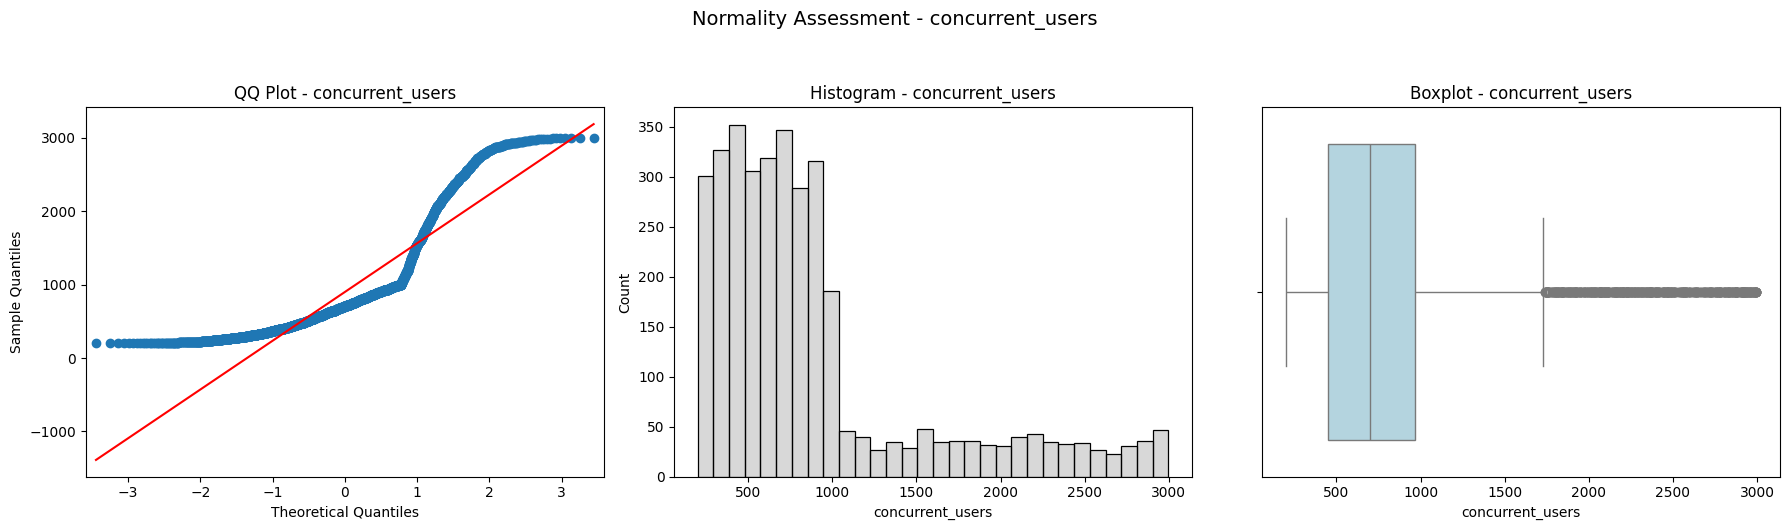


--- Variable: buffer_events_per_session ---
  Anderson-Darling Statistic : 170.2362
  Critical Value (@ 5.0%) : 0.7860
  Decision : Reject Null


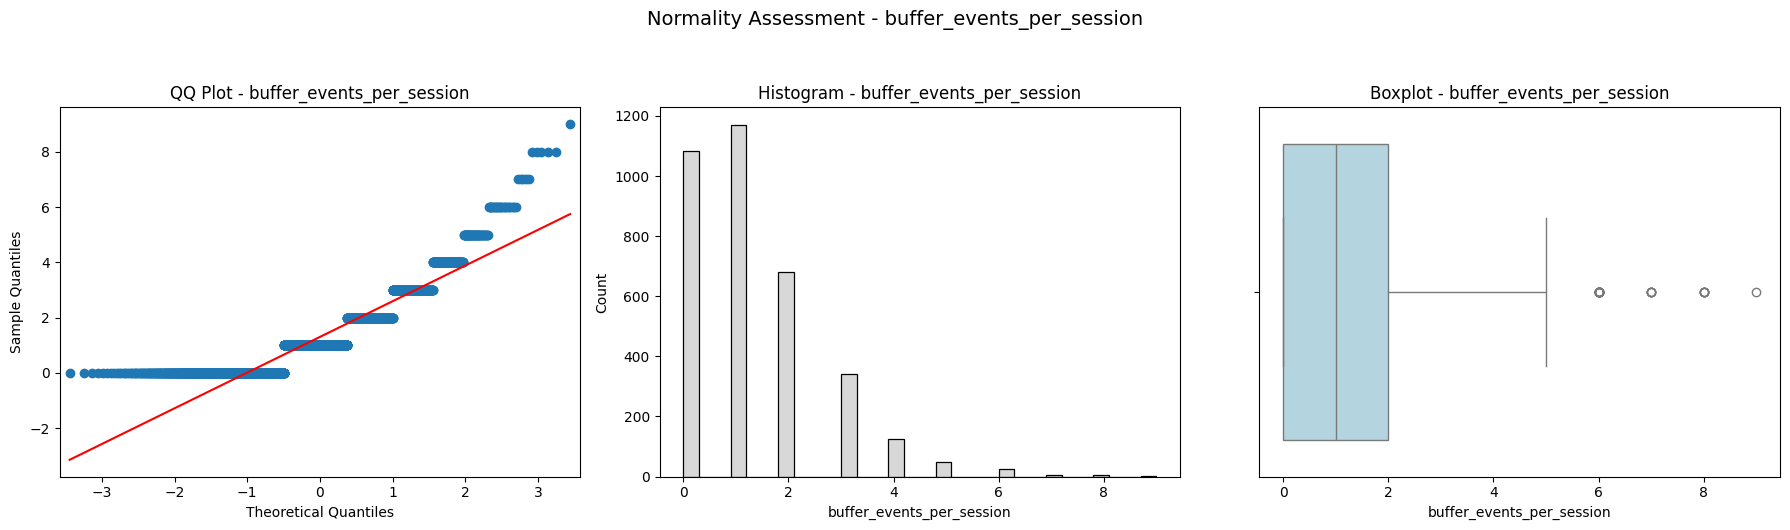


--- Variable: mobile_error_rate(proportion) ---
  Anderson-Darling Statistic : 55.7321
  Critical Value (@ 5.0%) : 0.7860
  Decision : Reject Null


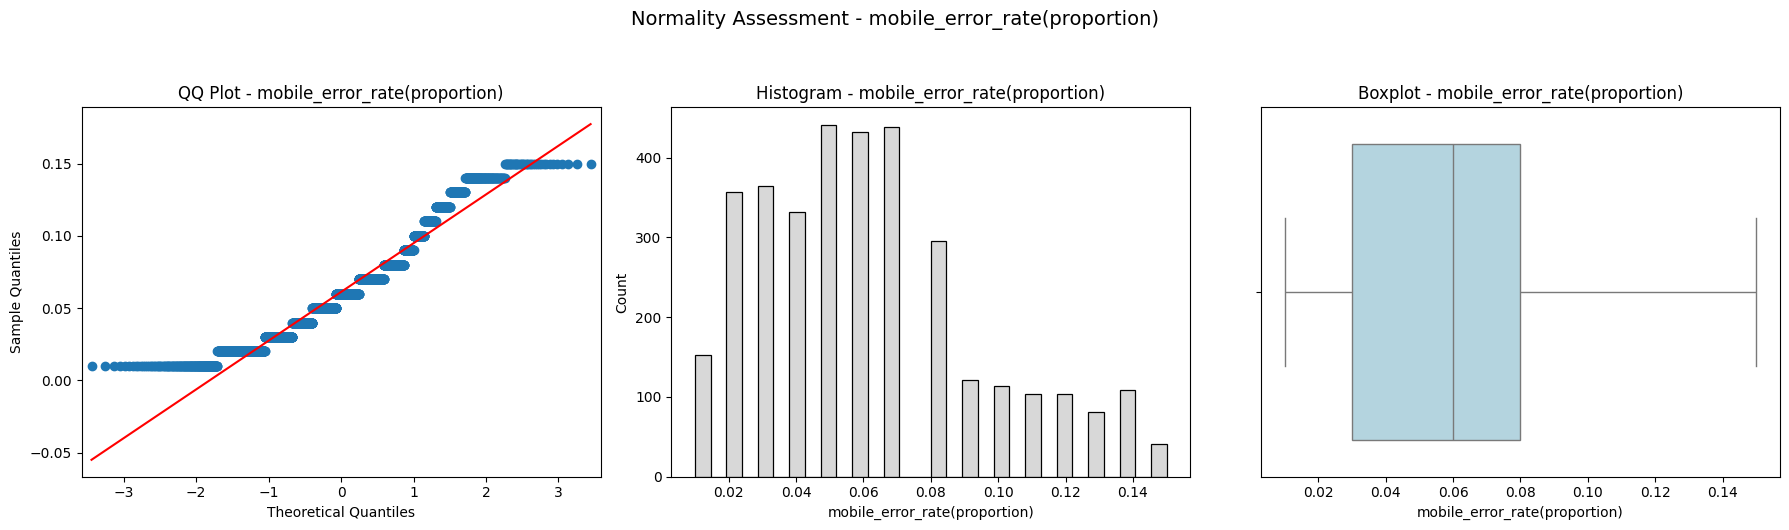


--- Variable: video_load_time(seconds) ---
  Anderson-Darling Statistic : 2.4418
  Critical Value (@ 5.0%) : 0.7860
  Decision : Reject Null


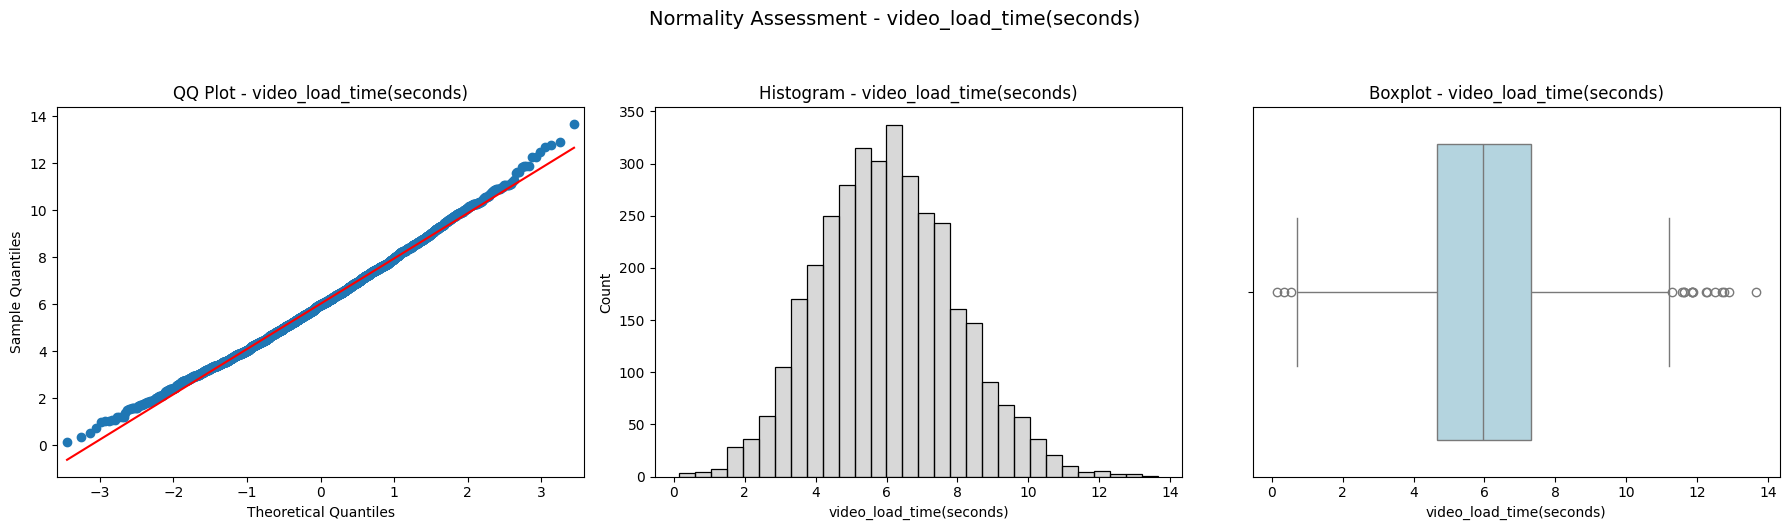


--- Variable: subtitle_accuracy_score(0-1) ---
  Anderson-Darling Statistic : 499.5729
  Critical Value (@ 5.0%) : 0.7860
  Decision : Reject Null


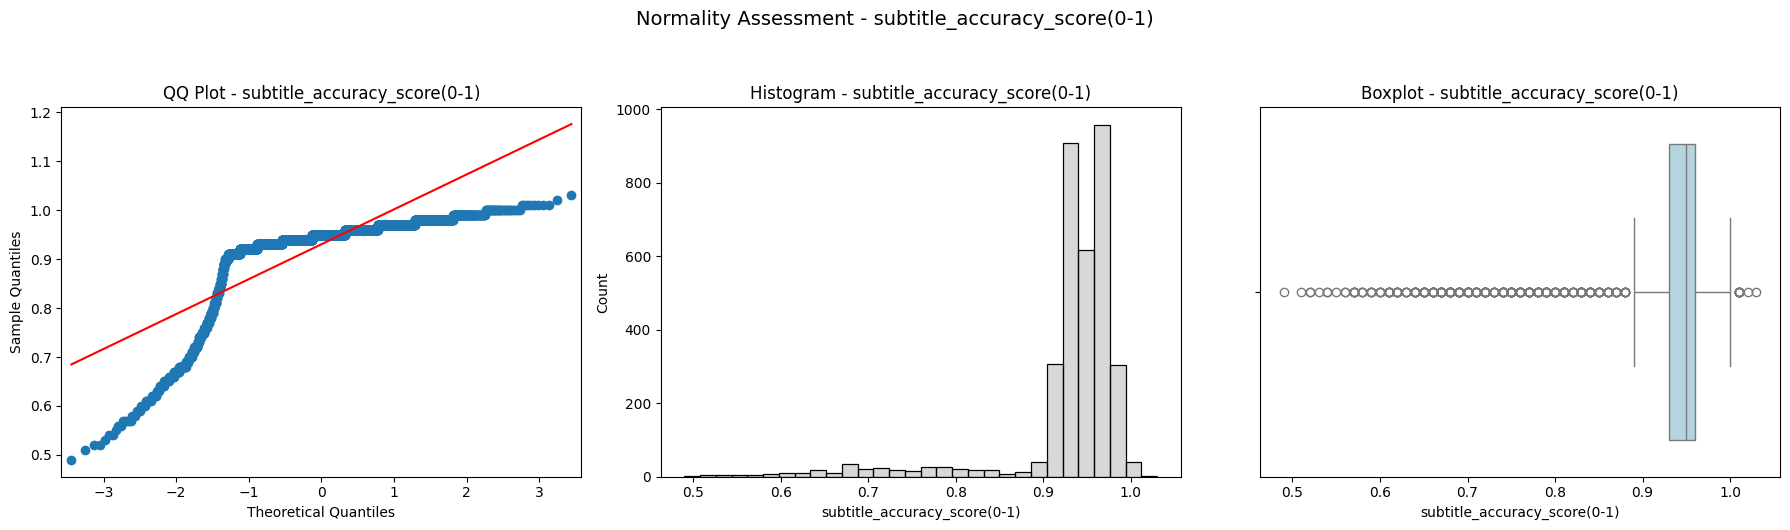


--- Variable: average_viewing_time(hours) ---
  Anderson-Darling Statistic : 3.6366
  Critical Value (@ 5.0%) : 0.7860
  Decision : Reject Null


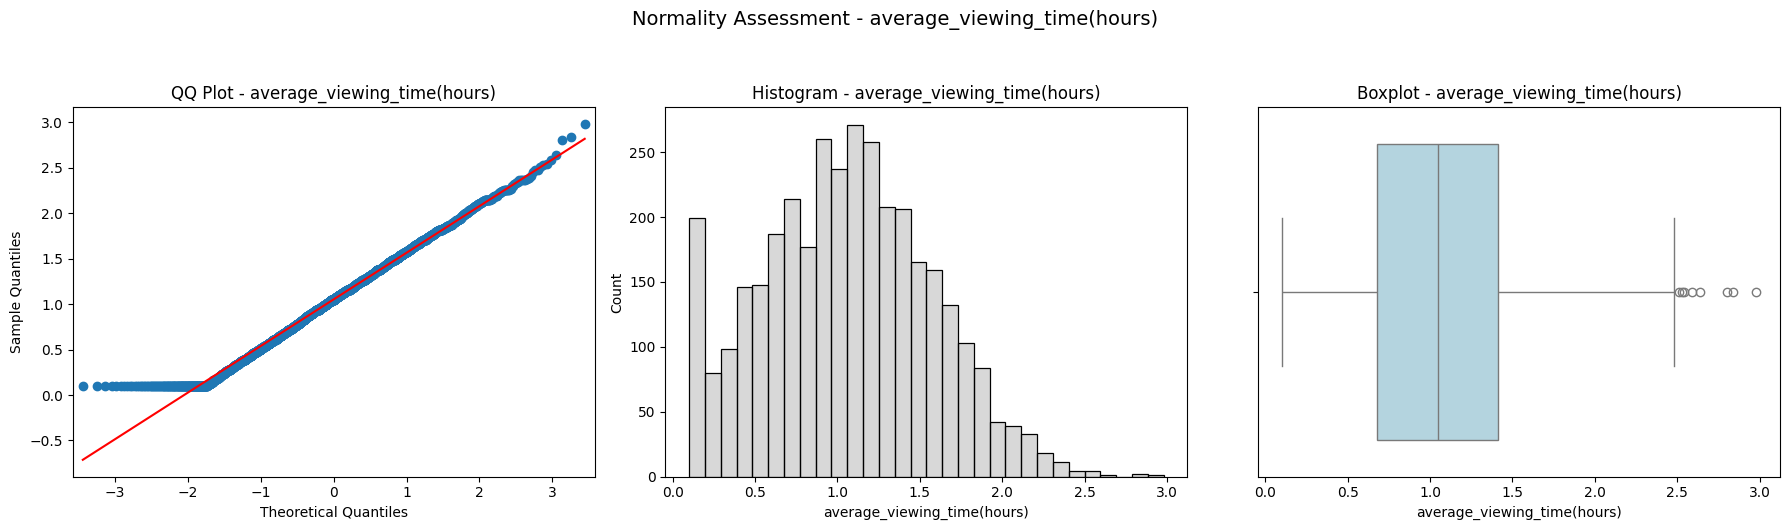


--- Variable: server_cost(in USD) ---
  Anderson-Darling Statistic : 9.1121
  Critical Value (@ 5.0%) : 0.7860
  Decision : Reject Null


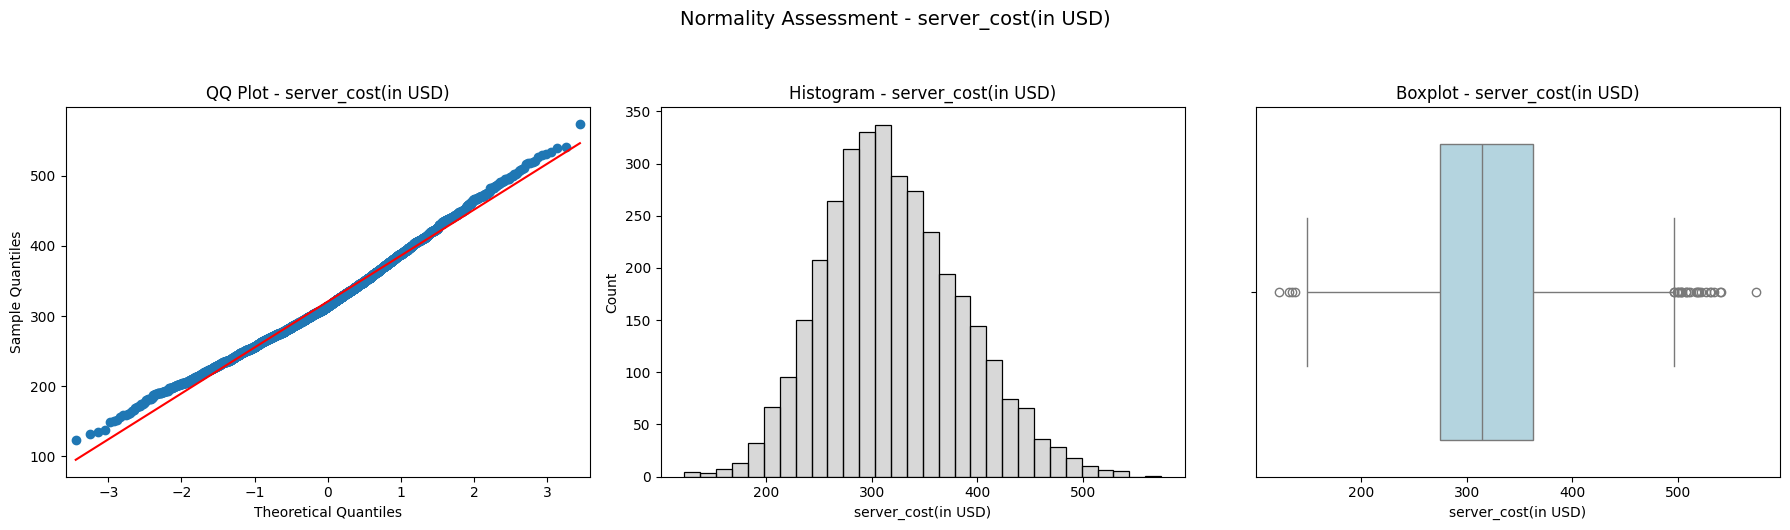


--- Variable: content_engagement_score(0-100) ---
  Anderson-Darling Statistic : 122.2160
  Critical Value (@ 5.0%) : 0.7860
  Decision : Reject Null


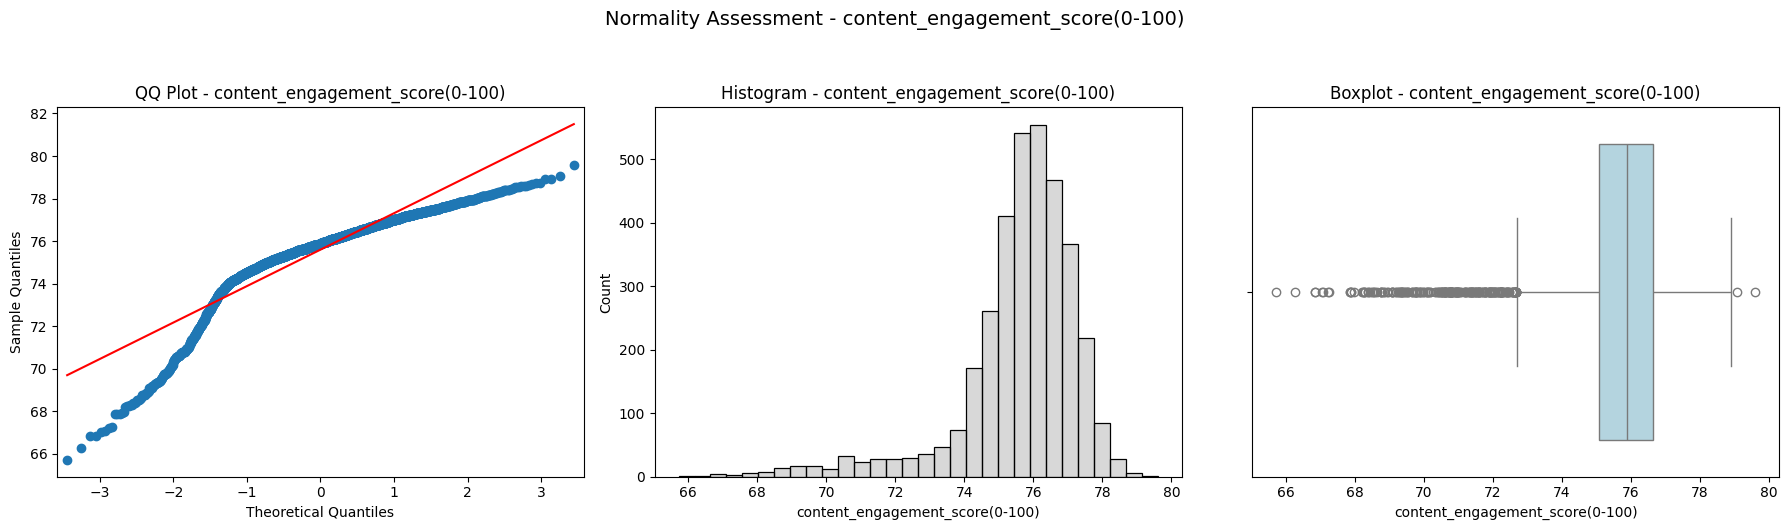

In [23]:
# Cell 23: Perform normality check using Anderson-Darling test and data visualizations for all numerical variables
qd.normcheck_dashboard(df)

In [24]:
# Cell 24: Generate frequency distributions for all categorical variables in the dataset
qd.freqdist_a(df)

,Column,Value,Count,Percentage
0,user_location_type,urban,2446,70.15
1,user_location_type,rural,1041,29.85
2,churn_flag,No,2940,84.31
3,churn_flag,Yes,547,15.69


Kendall's Tau correlation coefficient: 0.2034, p-value: 0.0000


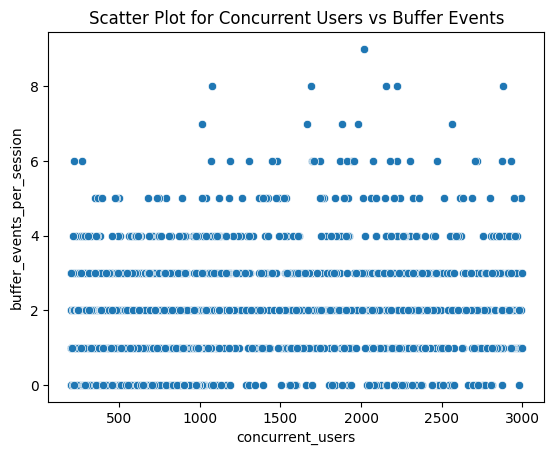

In [25]:
# Cell 25: Correlate concurrent users and buffer events using Kendall's Tau, with scatterplot visualization
kendall_corr, kendall_p = stats.kendalltau(df['concurrent_users'], df['buffer_events_per_session'])
print(f"Kendall's Tau correlation coefficient: {kendall_corr:.4f}, p-value: {kendall_p:.4f}")
sns.scatterplot(x=df['concurrent_users'], y=df['buffer_events_per_session'])
plt.title('Scatter Plot for Concurrent Users vs Buffer Events')
plt.show()

Kendall's Tau correlation coefficient: 0.1992, p-value: 0.0000


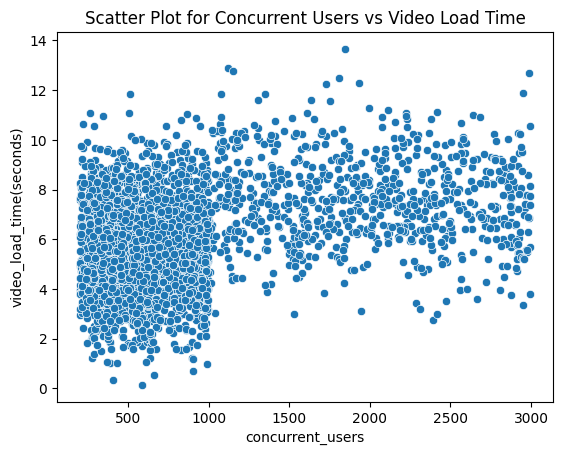

In [26]:
# Cell 26: Correlate concurrent users and video load time using Kendall's Tau, with scatterplot visualization
kendall_corr, kendall_p = stats.kendalltau(df['concurrent_users'], df['video_load_time(seconds)'])
print(f"Kendall's Tau correlation coefficient: {kendall_corr:.4f}, p-value: {kendall_p:.4f}")
sns.scatterplot(x=df['concurrent_users'], y=df['video_load_time(seconds)'])
plt.title('Scatter Plot for Concurrent Users vs Video Load Time')
plt.show()

Kendall's Tau correlation coefficient: 0.2873, p-value: 0.0000


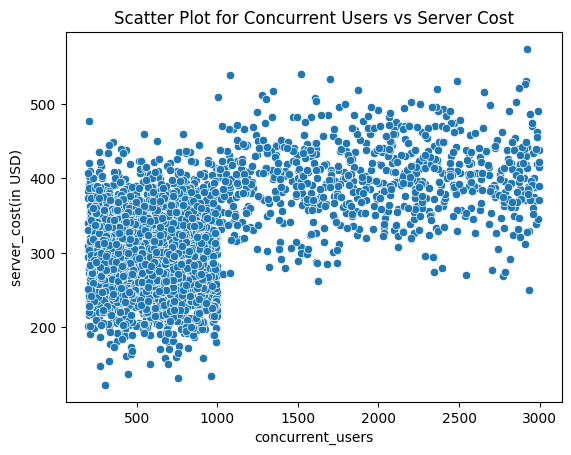

In [27]:
# Cell 27: Correlate concurrent users and server cost using Kendall's Tau, with scatterplot visualization
kendall_corr, kendall_p = stats.kendalltau(df['concurrent_users'], df['server_cost(in USD)'])
print(f"Kendall's Tau correlation coefficient: {kendall_corr:.4f}, p-value: {kendall_p:.4f}")
sns.scatterplot(x=df['concurrent_users'], y=df['server_cost(in USD)'])
plt.title('Scatter Plot for Concurrent Users vs Server Cost')
plt.show()

In [28]:
# Cell 28: Convert churn_flag to numerical values for correlation analysis
df['churn_numeric'] = df['churn_flag'].map({'Yes': 1, 'No': 0})

Kendall's Tau correlation coefficient: -0.5077, p-value: 0.0000


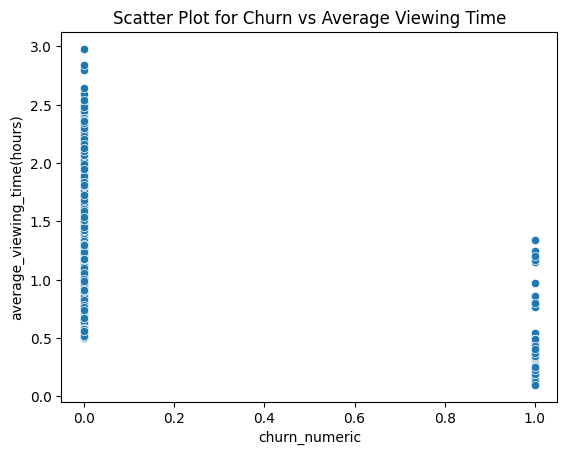

In [29]:
# Cell 29: Correlate churn (numeric) and average viewing time using Kendall's Tau, with scatterplot visualization
kendall_corr, kendall_p = stats.kendalltau(df['churn_numeric'], df['average_viewing_time(hours)'])
print(f"Kendall's Tau correlation coefficient: {kendall_corr:.4f}, p-value: {kendall_p:.4f}")
sns.scatterplot(x=df['churn_numeric'], y=df['average_viewing_time(hours)'])
plt.title('Scatter Plot for Churn vs Average Viewing Time')
plt.show()

Kendall's Tau correlation coefficient: -0.0940, p-value: 0.0000


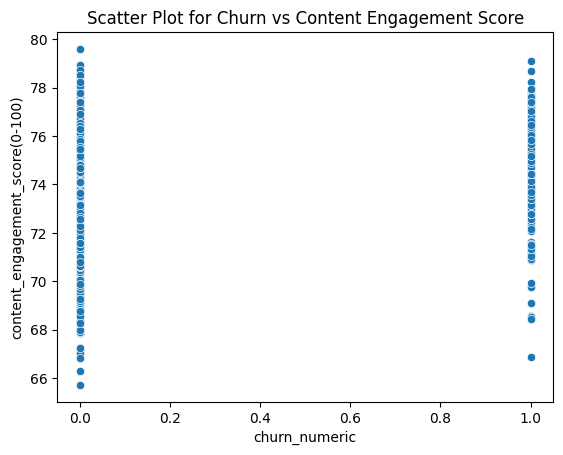

In [30]:
# Cell 30: Correlate churn (numeric) and content engagement score using Kendall's Tau, with scatterplot visualization
kendall_corr, kendall_p = stats.kendalltau(df['churn_numeric'], df['content_engagement_score(0-100)'])
print(f"Kendall's Tau correlation coefficient: {kendall_corr:.4f}, p-value: {kendall_p:.4f}")
sns.scatterplot(x=df['churn_numeric'], y=df['content_engagement_score(0-100)'])
plt.title('Scatter Plot for Churn vs Content Engagement Score')
plt.show()